In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as py
import seaborn as sns
import matplotlib.ticker as mtick
plt.style.use("fivethirtyeight")
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')



In [2]:
data = pd.read_csv(r"E:\Academics\Projects\Machine Learning Projects\Zomato Deployment\zomato.csv")

In [3]:
data

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


In [4]:
data.shape

(51717, 17)

In [5]:
data.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [6]:
data.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [7]:
df = data.drop(["url", "phone"], axis=1)

In [8]:
df

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


In [9]:
df.duplicated().sum()

43

In [10]:
df[df.duplicated()]

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
596,"572, 30th Main, 3rd Stage, Banashankari, Banga...",My Tea House,Yes,Yes,NEW,0,Banashankari,Casual Dining,NaN,"Continental, Asian, North Indian, Tea",500,"[('Rated 4.0', ""RATED\n So apparently I visit...","['MTH Signature Soup', 'Minestrone Veg', 'Broc...",Dine-out,Banashankari
7599,"17, Thubarahalli Village, Hobli, Varthur Main ...",Nawab Di Biryani,Yes,No,NEW,0,Whitefield,"Takeaway, Delivery",NaN,"Biryani, Mughlai",400,"[('Rated 4.0', 'RATED\n Ordered paneer tikka ...","['Paneer Tikka Biryani', 'Veg Lucknowi Biryani...",Delivery,Brookefield
9464,"744, 13th Main, 7th Cross, BTM 2nd Stage, BTM,...",Vyanjan,Yes,No,3.9/5,201,BTM,Quick Bites,"Poha, Jalebi, Paratha, Bhindi Masala, Kachori,...","North Indian, Street Food",300,"[('Rated 3.0', ""RATED\n Nice place, it's for ...","['Jeera Rice', 'Khichdi', 'Plain Tawa Roti', '...",Delivery,BTM
9466,"607, First Floor, 80 Feet Road, 6th Block, Kor...",Carrots,Yes,Yes,4.1/5,600,Koramangala 6th Block,Casual Dining,"Pizza, Pasta, Salads, Masala Chai, Soya Butter...","Italian, North Indian, Healthy Food, Desserts","1,100","[('Rated 5.0', ""RATED\n It's the first vegan ...",[],Delivery,BTM
9467,"Building 58, New 3, A Main Road Marenahalli, J...",Eatsomnia,Yes,No,NEW,0,JP Nagar,Delivery,NaN,"North Indian, South Indian, Chinese, Continental",500,"[('Rated 1.0', ""RATED\n The worst food I ate ...",[],Delivery,BTM
9468,"6th Cross Road, Koramangala 6th Block, Bangalore",Rolls & Co,Yes,No,3.9/5,213,Koramangala 6th Block,Quick Bites,"Rolls, Chicken Wings, Shawarma, Chicken Tikka ...","Burger, Beverages, Rolls",400,"[('Rated 2.0', 'RATED\n Order : Peri Peri Fri...",[],Delivery,BTM
9469,"10, Opposite Forum Mall, Taverekere, Suddagunt...",Fogg,No,Yes,NEW,0,BTM,Quick Bites,NaN,"Fast Food, Chinese",200,"[('Rated 5.0', 'RATED\n Seafood soup - A Thai...",[],Delivery,BTM
9470,"Koramangala 1st Block, Bangalore",The Paratha Stories,Yes,No,3.3/5,36,Koramangala 1st Block,Delivery,NaN,North Indian,400,"[('Rated 3.0', 'RATED\n There is enough scope...",[],Delivery,BTM
9471,"29, 7th Cross Road, Bhavani Nagar, Suddagunte ...",Mycakeshop,Yes,No,NaN,0,BTM,Bakery,NaN,"Bakery, Desserts",300,"[('Rated 5.0', 'RATED\n I loved cake nice tru...","['Red Velvet Cake', 'Truffle Chocolate Cake', ...",Delivery,BTM
9549,"51, 5th Main, 60 Feet Road, BNG Homestay Build...",Bisimillah Biriyani,No,No,3.5/5,11,BTM,Quick Bites,NaN,"Biryani, Fast Food",300,"[('Rated 4.0', 'RATED\n Very delicious food @...",[],Delivery,BTM


In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.duplicated().sum()

0

In [13]:
df.shape

(51674, 15)

In [14]:
df.dropna(how="any", inplace=True)

In [15]:
df.isnull().sum()

address                        0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
dish_liked                     0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
menu_item                      0
listed_in(type)                0
listed_in(city)                0
dtype: int64

In [16]:
df.shape

(23395, 15)

In [17]:
df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [18]:
df = df.rename(columns={"approx_cost(for two people)" : "cost", "listed_in(type)": "type", "listed_in(city)": "city"})

In [19]:
df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'dish_liked', 'cuisines', 'cost',
       'reviews_list', 'menu_item', 'type', 'city'],
      dtype='object')

In [20]:
df["cost"].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '750', '200', '850', '1,200', '150', '350', '250', '1,500',
       '1,300', '1,000', '100', '900', '1,100', '1,600', '950', '230',
       '1,700', '1,400', '1,350', '2,200', '2,000', '1,800', '1,900',
       '180', '330', '2,500', '2,100', '3,000', '2,800', '3,400', '40',
       '1,250', '3,500', '4,000', '2,400', '1,450', '3,200', '6,000',
       '1,050', '4,100', '2,300', '120', '2,600', '5,000', '3,700',
       '1,650', '2,700', '4,500'], dtype=object)

In [21]:
df["cost"] = df["cost"].apply(lambda x:x.replace(",",""))

In [22]:
df["cost"].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '750', '200', '850', '1200', '150', '350', '250', '1500', '1300',
       '1000', '100', '900', '1100', '1600', '950', '230', '1700', '1400',
       '1350', '2200', '2000', '1800', '1900', '180', '330', '2500',
       '2100', '3000', '2800', '3400', '40', '1250', '3500', '4000',
       '2400', '1450', '3200', '6000', '1050', '4100', '2300', '120',
       '2600', '5000', '3700', '1650', '2700', '4500'], dtype=object)

In [23]:
df["cost"] = df["cost"].astype(float)

In [24]:
df["cost"].dtype

dtype('float64')

In [25]:
df.shape

(23395, 15)

In [26]:
df.dtypes

address          object
name             object
online_order     object
book_table       object
rate             object
votes             int64
location         object
rest_type        object
dish_liked       object
cuisines         object
cost            float64
reviews_list     object
menu_item        object
type             object
city             object
dtype: object

In [27]:
df["rate"].unique()

array(['4.1/5', '3.8/5', '3.7/5', '4.6/5', '4.0/5', '4.2/5', '3.9/5',
       '3.0/5', '3.6/5', '2.8/5', '4.4/5', '3.1/5', '4.3/5', '2.6/5',
       '3.3/5', '3.5/5', '3.8 /5', '3.2/5', '4.5/5', '2.5/5', '2.9/5',
       '3.4/5', '2.7/5', '4.7/5', 'NEW', '2.4/5', '2.2/5', '2.3/5',
       '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5', '2.9 /5',
       '2.7 /5', '2.5 /5', '2.6 /5', '4.5 /5', '4.3 /5', '3.7 /5',
       '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '3.4 /5', '3.6 /5',
       '3.3 /5', '4.6 /5', '4.9 /5', '3.2 /5', '3.0 /5', '2.8 /5',
       '3.5 /5', '3.1 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [28]:
len(df["rate"].unique())

63

In [29]:
df["rate"].value_counts().head(50)

rate
3.9/5     1691
3.9 /5    1555
4.0/5     1475
4.0 /5    1427
4.1/5     1417
4.1 /5    1410
3.8/5     1332
3.8 /5    1151
4.2 /5    1122
4.2/5     1002
4.3 /5     909
3.7/5      875
3.7 /5     771
4.3/5      771
4.4 /5     623
4.4/5      519
3.6/5      447
3.6 /5     431
4.5 /5     404
3.5/5      260
4.5/5      244
3.5 /5     222
3.4 /5     185
3.0/5      185
4.6 /5     175
2.9/5      175
3.4/5      166
3.1/5      163
2.8 /5     163
2.8/5      158
NEW        147
3.1 /5     144
2.9 /5     138
3.2/5      137
3.3/5      127
4.6/5      125
3.2 /5     113
3.0 /5     106
2.7/5      105
3.3 /5      92
4.7 /5      86
2.7 /5      85
4.7/5       81
2.6/5       77
2.6 /5      61
4.8 /5      43
2.5 /5      32
2.4/5       30
4.9 /5      30
4.9/5       25
Name: count, dtype: int64

In [30]:
df = df.loc[df["rate"]!="NEW"]

In [31]:
df["rate"].value_counts().head(60)

rate
3.9/5     1691
3.9 /5    1555
4.0/5     1475
4.0 /5    1427
4.1/5     1417
4.1 /5    1410
3.8/5     1332
3.8 /5    1151
4.2 /5    1122
4.2/5     1002
4.3 /5     909
3.7/5      875
3.7 /5     771
4.3/5      771
4.4 /5     623
4.4/5      519
3.6/5      447
3.6 /5     431
4.5 /5     404
3.5/5      260
4.5/5      244
3.5 /5     222
3.0/5      185
3.4 /5     185
4.6 /5     175
2.9/5      175
3.4/5      166
2.8 /5     163
3.1/5      163
2.8/5      158
3.1 /5     144
2.9 /5     138
3.2/5      137
3.3/5      127
4.6/5      125
3.2 /5     113
3.0 /5     106
2.7/5      105
3.3 /5      92
4.7 /5      86
2.7 /5      85
4.7/5       81
2.6/5       77
2.6 /5      61
4.8 /5      43
2.5 /5      32
4.9 /5      30
2.4/5       30
4.9/5       25
2.3/5       25
2.5/5       25
2.4 /5      24
4.8/5       23
2.3 /5      20
2.2/5       19
2.1 /5      13
2.1/5       11
2.2 /5       7
2.0 /5       7
2.0/5        4
Name: count, dtype: int64

In [32]:
df.shape

(23248, 15)

In [33]:
df

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51705,"2nd Floor, Iona, Virginia Mall, Whitefield Mai...",Izakaya Gastro Pub,Yes,Yes,3.8 /5,128,Whitefield,"Bar, Casual Dining","Beer, Chicken Guntur, Paneer Tikka, Fish, Nood...","North Indian, Continental, Mediterranean",1200.0,"[('Rated 3.0', ""RATED\n Nice place to hangout...",[],Pubs and bars,Whitefield
51707,"Bengaluru Marriott Hotel, 75, 8th Road, EPIP A...",M Bar - Bengaluru Marriott Hotel Whitefield,No,No,3.9 /5,77,Whitefield,"Fine Dining, Bar",Rooftop Ambience,Finger Food,2000.0,"[('Rated 4.0', 'RATED\n Went there post dinne...",[],Pubs and bars,Whitefield
51708,"Keys Hotel, 6, 1st Phase Industrial Area, Near...",Keys Cafe - Keys Hotel,No,No,2.8 /5,161,Whitefield,"Casual Dining, Bar","Salads, Coffee, Breakfast Buffet, Halwa, Chick...","Chinese, Continental, North Indian",1200.0,"[('Rated 3.0', 'RATED\n Place is good not tha...",[],Pubs and bars,Whitefield
51711,"139/C1, Next To GR Tech Park, Pattandur Agraha...",Bhagini,No,No,2.5 /5,81,Whitefield,"Casual Dining, Bar","Biryani, Andhra Meal","Andhra, South Indian, Chinese, North Indian",800.0,"[('Rated 4.0', 'RATED\n A fine place to chill...",[],Pubs and bars,Whitefield


In [34]:
len(df["rate"].unique())

62

In [35]:
df["rate"].unique()

array(['4.1/5', '3.8/5', '3.7/5', '4.6/5', '4.0/5', '4.2/5', '3.9/5',
       '3.0/5', '3.6/5', '2.8/5', '4.4/5', '3.1/5', '4.3/5', '2.6/5',
       '3.3/5', '3.5/5', '3.8 /5', '3.2/5', '4.5/5', '2.5/5', '2.9/5',
       '3.4/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5', '4.8/5',
       '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5', '2.9 /5', '2.7 /5',
       '2.5 /5', '2.6 /5', '4.5 /5', '4.3 /5', '3.7 /5', '4.4 /5',
       '4.9/5', '2.1/5', '2.0/5', '1.8/5', '3.4 /5', '3.6 /5', '3.3 /5',
       '4.6 /5', '4.9 /5', '3.2 /5', '3.0 /5', '2.8 /5', '3.5 /5',
       '3.1 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5', '2.1 /5',
       '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [36]:
df["rate"] = df["rate"].apply(lambda x: x.replace("/5",""))

In [37]:
df["rate"].unique()

array(['4.1', '3.8', '3.7', '4.6', '4.0', '4.2', '3.9', '3.0', '3.6',
       '2.8', '4.4', '3.1', '4.3', '2.6', '3.3', '3.5', '3.8 ', '3.2',
       '4.5', '2.5', '2.9', '3.4', '2.7', '4.7', '2.4', '2.2', '2.3',
       '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ', '2.9 ', '2.7 ', '2.5 ',
       '2.6 ', '4.5 ', '4.3 ', '3.7 ', '4.4 ', '4.9', '2.1', '2.0', '1.8',
       '3.4 ', '3.6 ', '3.3 ', '4.6 ', '4.9 ', '3.2 ', '3.0 ', '2.8 ',
       '3.5 ', '3.1 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ', '2.2 ',
       '2.0 ', '1.8 '], dtype=object)

In [38]:
df["name"].value_counts()

name
Onesta                 85
Empire Restaurant      67
KFC                    59
McDonald's             57
Pizza Hut              56
                       ..
Insomniac's Delight     1
Popular Burger          1
Fresh 'N' Grills        1
Lassi Resto Cafe        1
Fujian Express          1
Name: count, Length: 3157, dtype: int64

In [39]:
df["name"].value_counts().head(20)

name
Onesta                    85
Empire Restaurant         67
KFC                       59
McDonald's                57
Pizza Hut                 56
Domino's Pizza            55
Smally's Resto Cafe       54
Faasos                    54
Corner House Ice Cream    52
Burger King               51
Polar Bear                48
Smoor                     47
Mani's Dum Biryani        47
Pizza Stop                46
Mainland China            45
Chung Wah                 45
Subway                    45
Lakeview Milkbar          44
eat.fit                   44
Hammered                  44
Name: count, dtype: int64

In [40]:
chains = df["name"].value_counts().head(20)

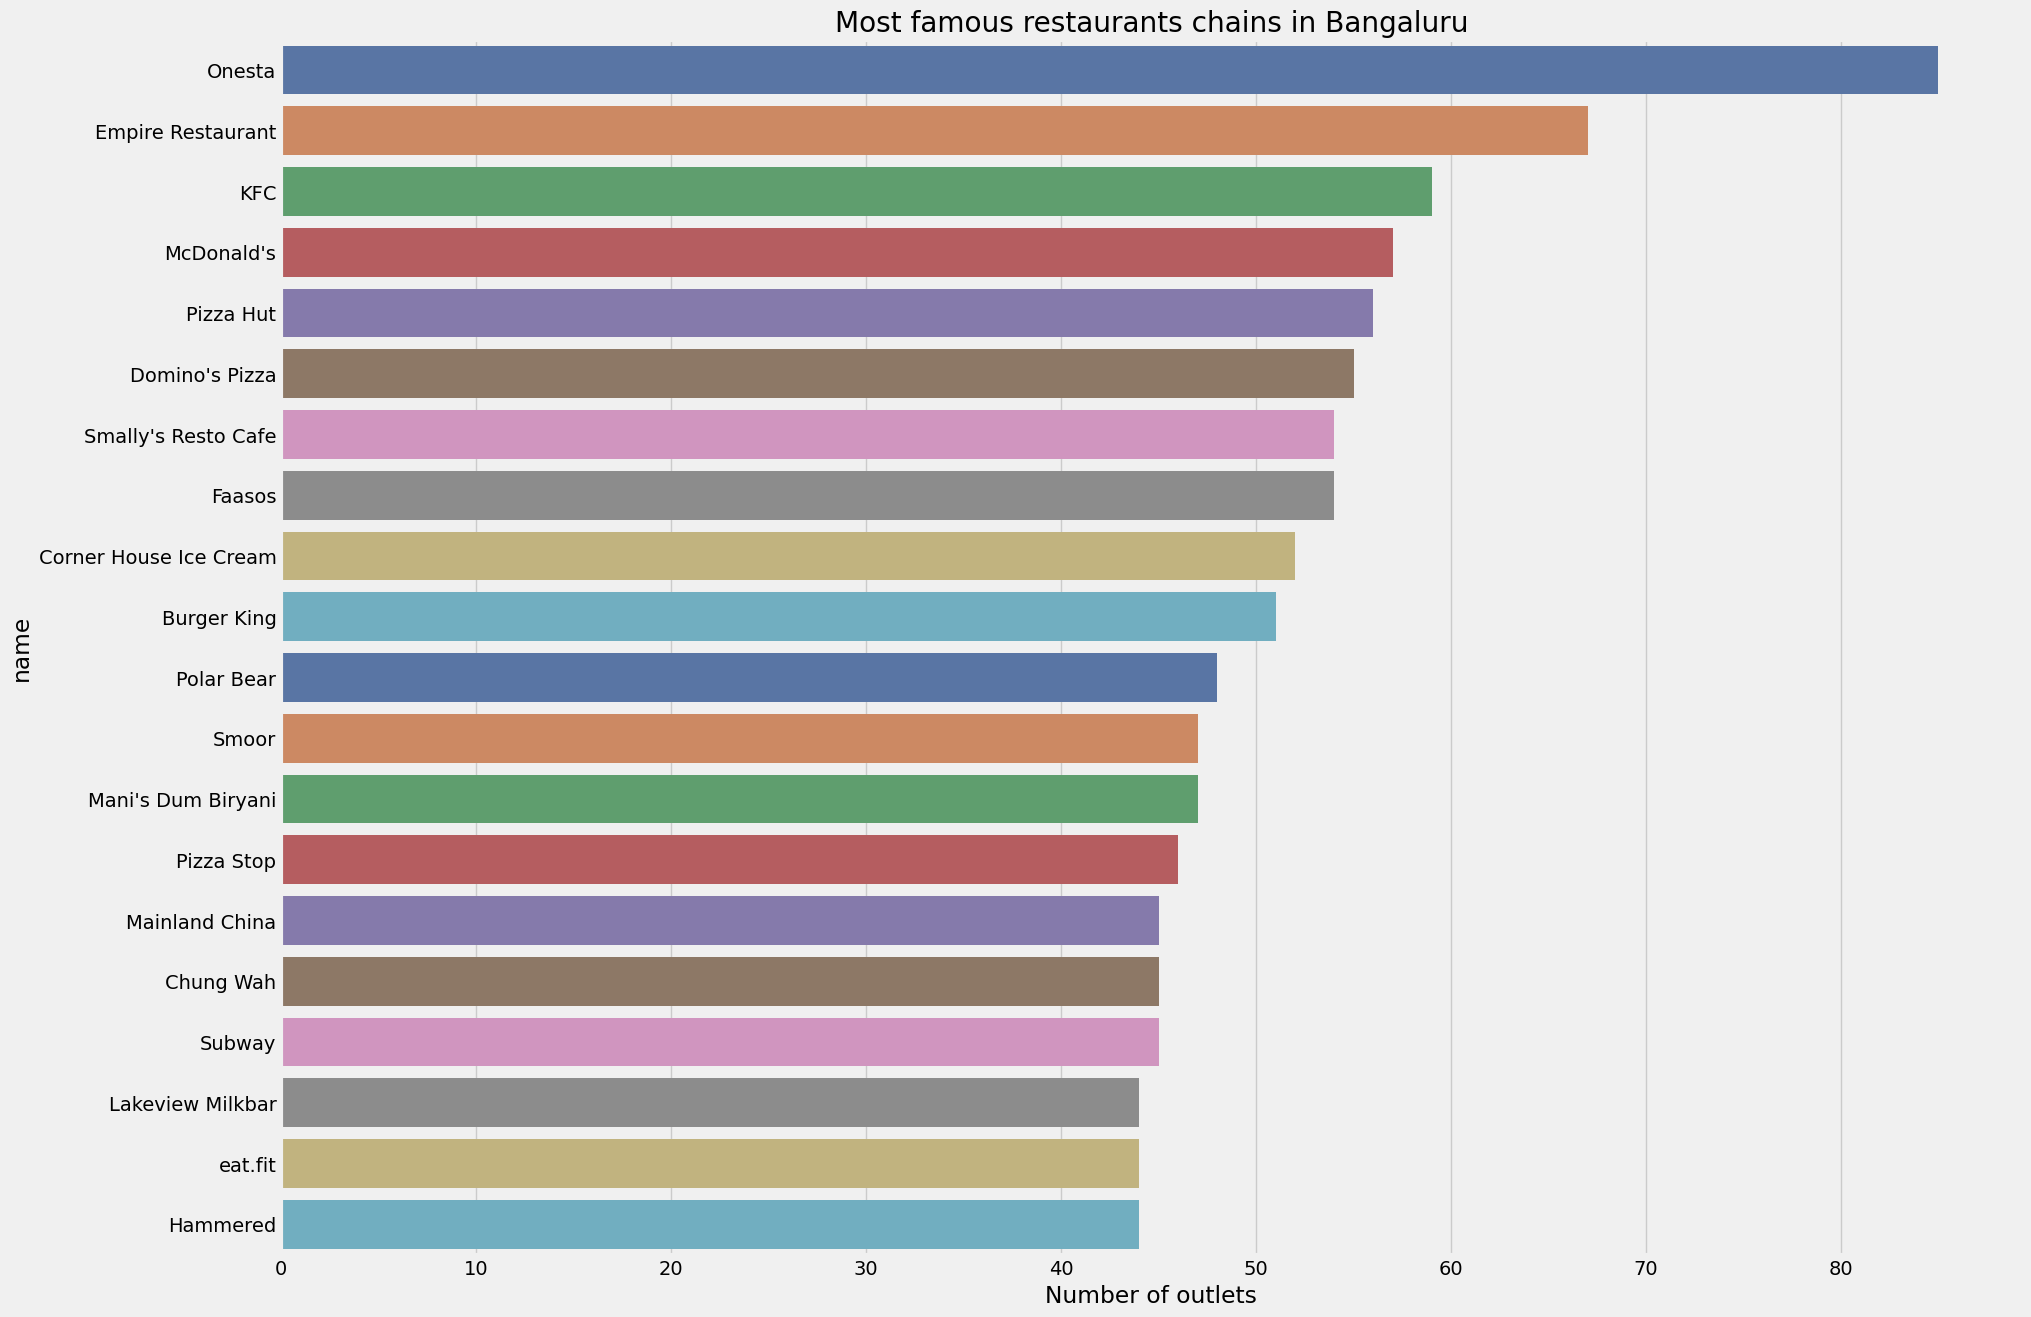

In [41]:
plt.figure(figsize=(20,15))
sns.barplot(x=chains,y=chains.index,palette='deep', hue=chains.index)
plt.title("Most famous restaurants chains in Bangaluru")
plt.xlabel("Number of outlets")
plt.show()


In [42]:
df["book_table"].value_counts()

book_table
No     17191
Yes     6057
Name: count, dtype: int64

In [43]:
x = df["book_table"].value_counts()

colors = ["red", "green"]

# Create the pie chart
trace = go.Pie(labels=x.index, values=x, textinfo="value", marker=dict(colors=colors, line=dict(color="black", width=2)))
layout = go.Layout(title="Table Booking", width=800, height=800)

# Create the figure
fig = go.Figure(data=[trace], layout=layout)

# Display the figure
fig.show()

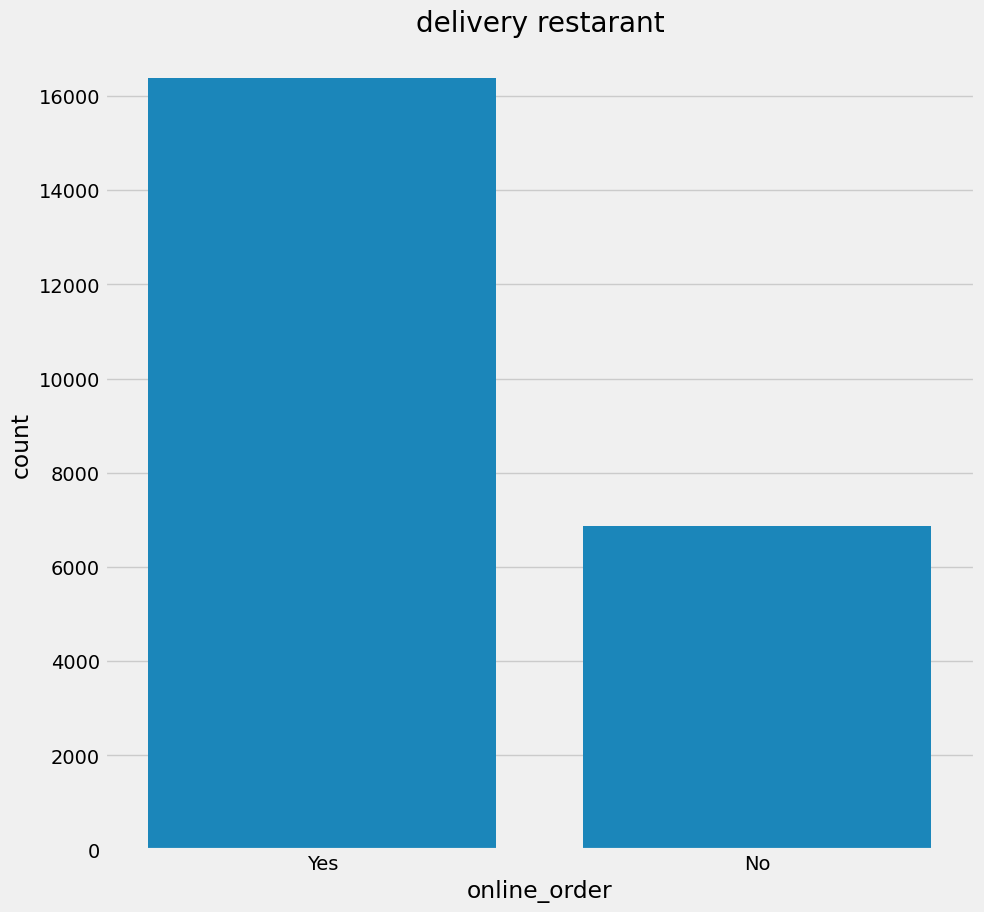

In [44]:
sns.countplot(x = "online_order", data=df )
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title("delivery restarant")
plt.show()

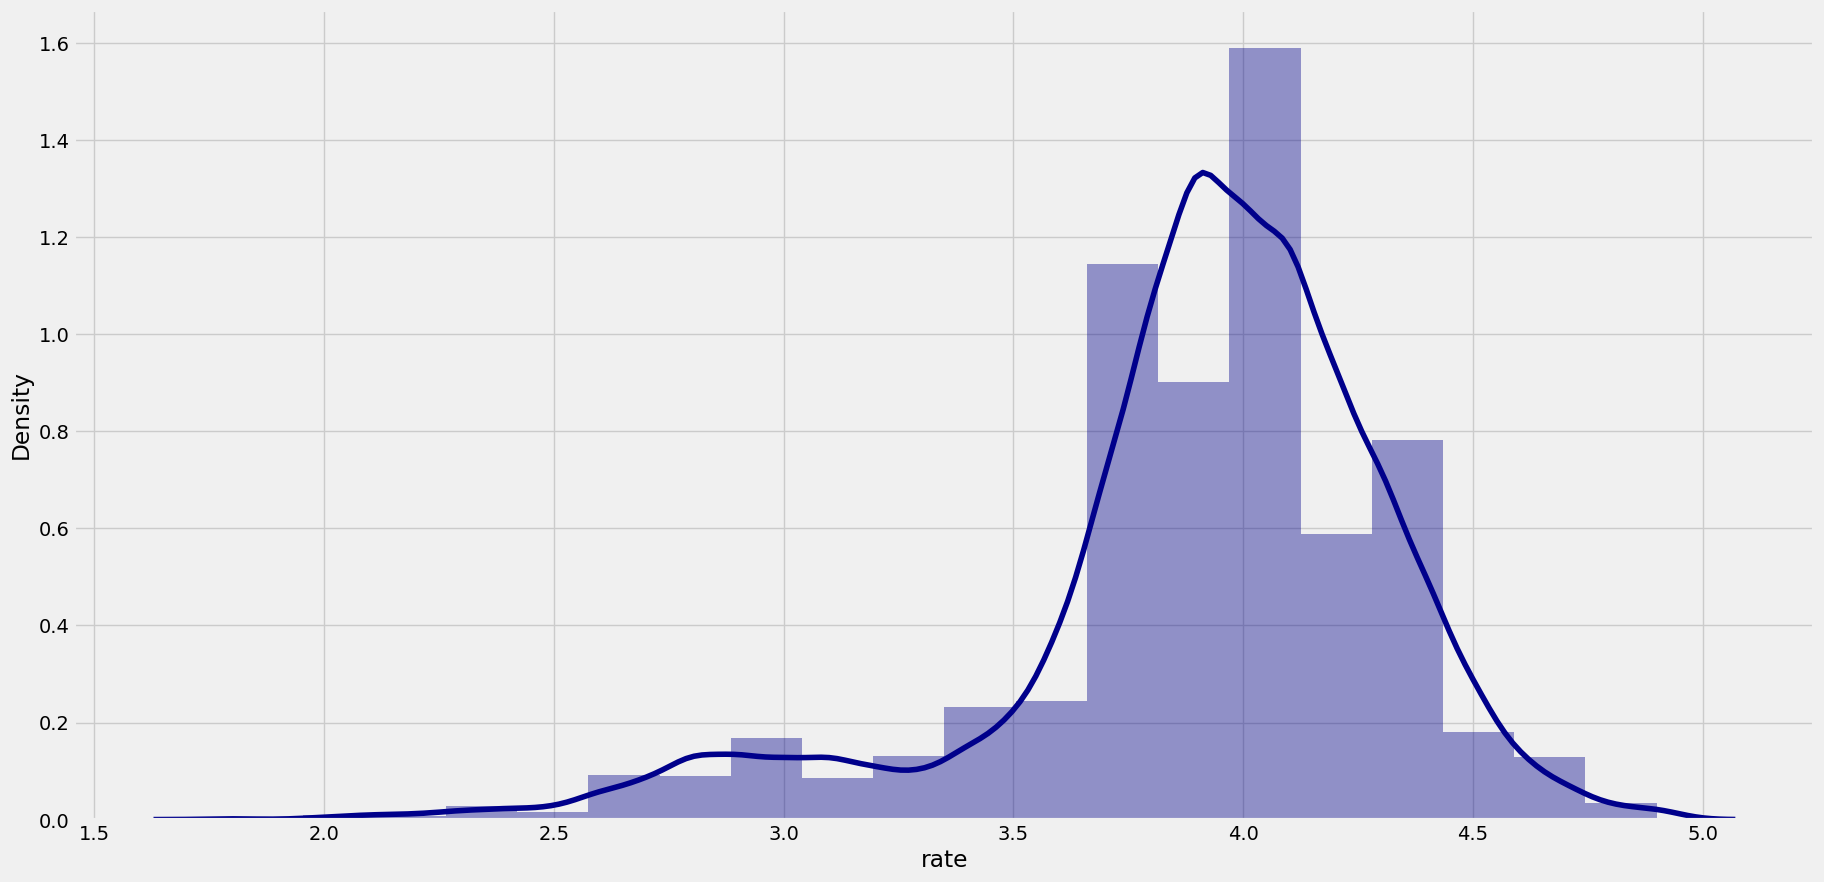

In [45]:
plt.figure(figsize=(20,10))
sns.distplot(df['rate'], bins=20, color='darkblue')  # You can adjust the color as needed
plt.show()


In [46]:
df["rate"].unique()

array(['4.1', '3.8', '3.7', '4.6', '4.0', '4.2', '3.9', '3.0', '3.6',
       '2.8', '4.4', '3.1', '4.3', '2.6', '3.3', '3.5', '3.8 ', '3.2',
       '4.5', '2.5', '2.9', '3.4', '2.7', '4.7', '2.4', '2.2', '2.3',
       '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ', '2.9 ', '2.7 ', '2.5 ',
       '2.6 ', '4.5 ', '4.3 ', '3.7 ', '4.4 ', '4.9', '2.1', '2.0', '1.8',
       '3.4 ', '3.6 ', '3.3 ', '4.6 ', '4.9 ', '3.2 ', '3.0 ', '2.8 ',
       '3.5 ', '3.1 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ', '2.2 ',
       '2.0 ', '1.8 '], dtype=object)

In [47]:
len(df["rate"].unique())

62

In [48]:
df["rate"].min()

'1.8'

In [49]:
df["rate"].max()

'4.9 '

In [50]:
df["rate"] = df["rate"].astype(float)

In [51]:
df["rate"].dtype

dtype('float64')

In [52]:
df["rate"].unique()

array([4.1, 3.8, 3.7, 4.6, 4. , 4.2, 3.9, 3. , 3.6, 2.8, 4.4, 3.1, 4.3,
       2.6, 3.3, 3.5, 3.2, 4.5, 2.5, 2.9, 3.4, 2.7, 4.7, 2.4, 2.2, 2.3,
       4.8, 4.9, 2.1, 2. , 1.8])

In [53]:
len(df["rate"].unique())

31

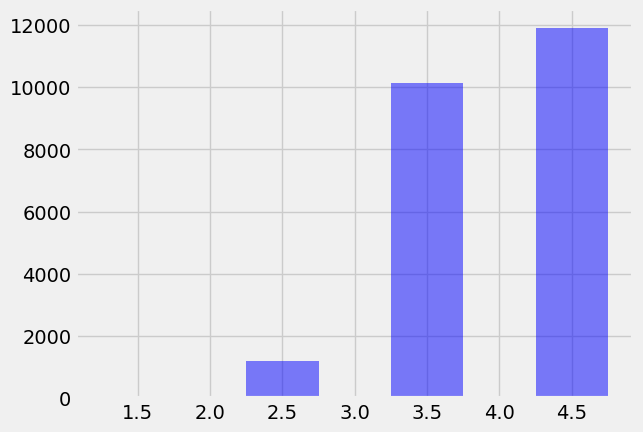

In [54]:
group = [1,2,3,4,5]
plt.hist(df["rate"], group, histtype="bar", rwidth=0.5, color="b", alpha=0.5)
plt.show()

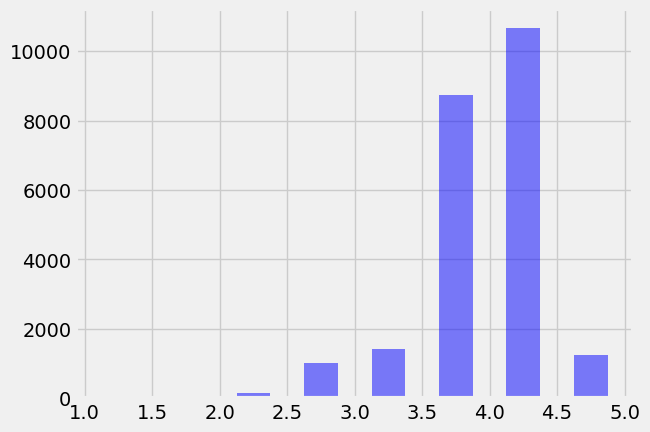

In [55]:
group = [1,1.5,2,2.5,3,3.5,4,4.5,5]
plt.hist(df["rate"], group, histtype="bar", rwidth=0.5, color="b", alpha=0.5)
plt.show()

In [56]:
gr_1to2 = ((df["rate"]>=1)& (df["rate"]<2)).sum()

In [57]:
gr_1to2

5

In [58]:
gr_2to3 = ((df["rate"]>=2)& (df["rate"]<3)).sum()

In [59]:
gr_2to3

1179

In [60]:
gr_3to4 = ((df["rate"]>=3)& (df["rate"]<4)).sum()
gr_3to4

10153

In [61]:
gr_4to5 = ((df["rate"]>=4)& (df["rate"]<5)).sum()
gr_4to5

11911

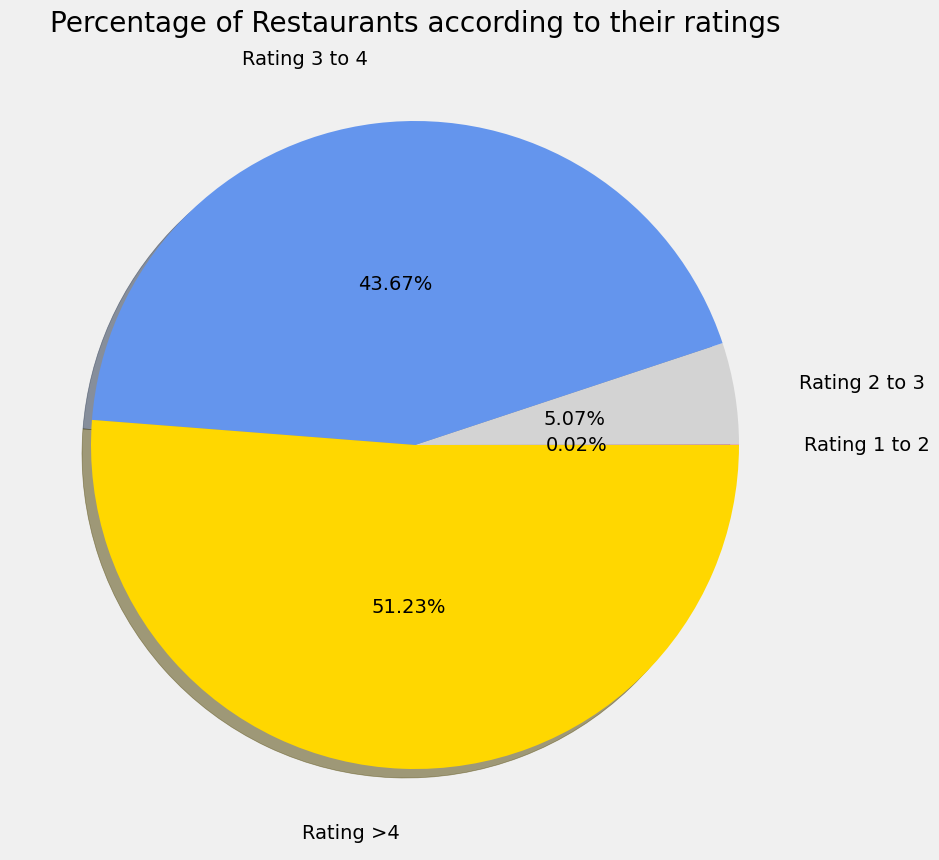

In [62]:
slices = [gr_1to2, gr_2to3, gr_3to4, gr_4to5]   
labels = ['Rating 1 to 2', 'Rating 2 to 3', 'Rating 3 to 4', 'Rating >4']
colors = ['red', 'lightgrey', 'cornflowerblue', 'gold']  # Using color names

plt.pie(slices, colors=colors, labels=labels, autopct='%1.2f%%', 
        pctdistance=0.5, labeldistance=1.2, shadow=True)

fig = plt.gcf()
plt.title("Percentage of Restaurants according to their ratings")

fig.set_size_inches(10, 10)
plt.show()


In [63]:
df["type"].value_counts()

type
Delivery              10657
Dine-out               8006
Desserts               1364
Cafes                  1066
Drinks & nightlife      879
Buffet                  753
Pubs and bars           523
Name: count, dtype: int64

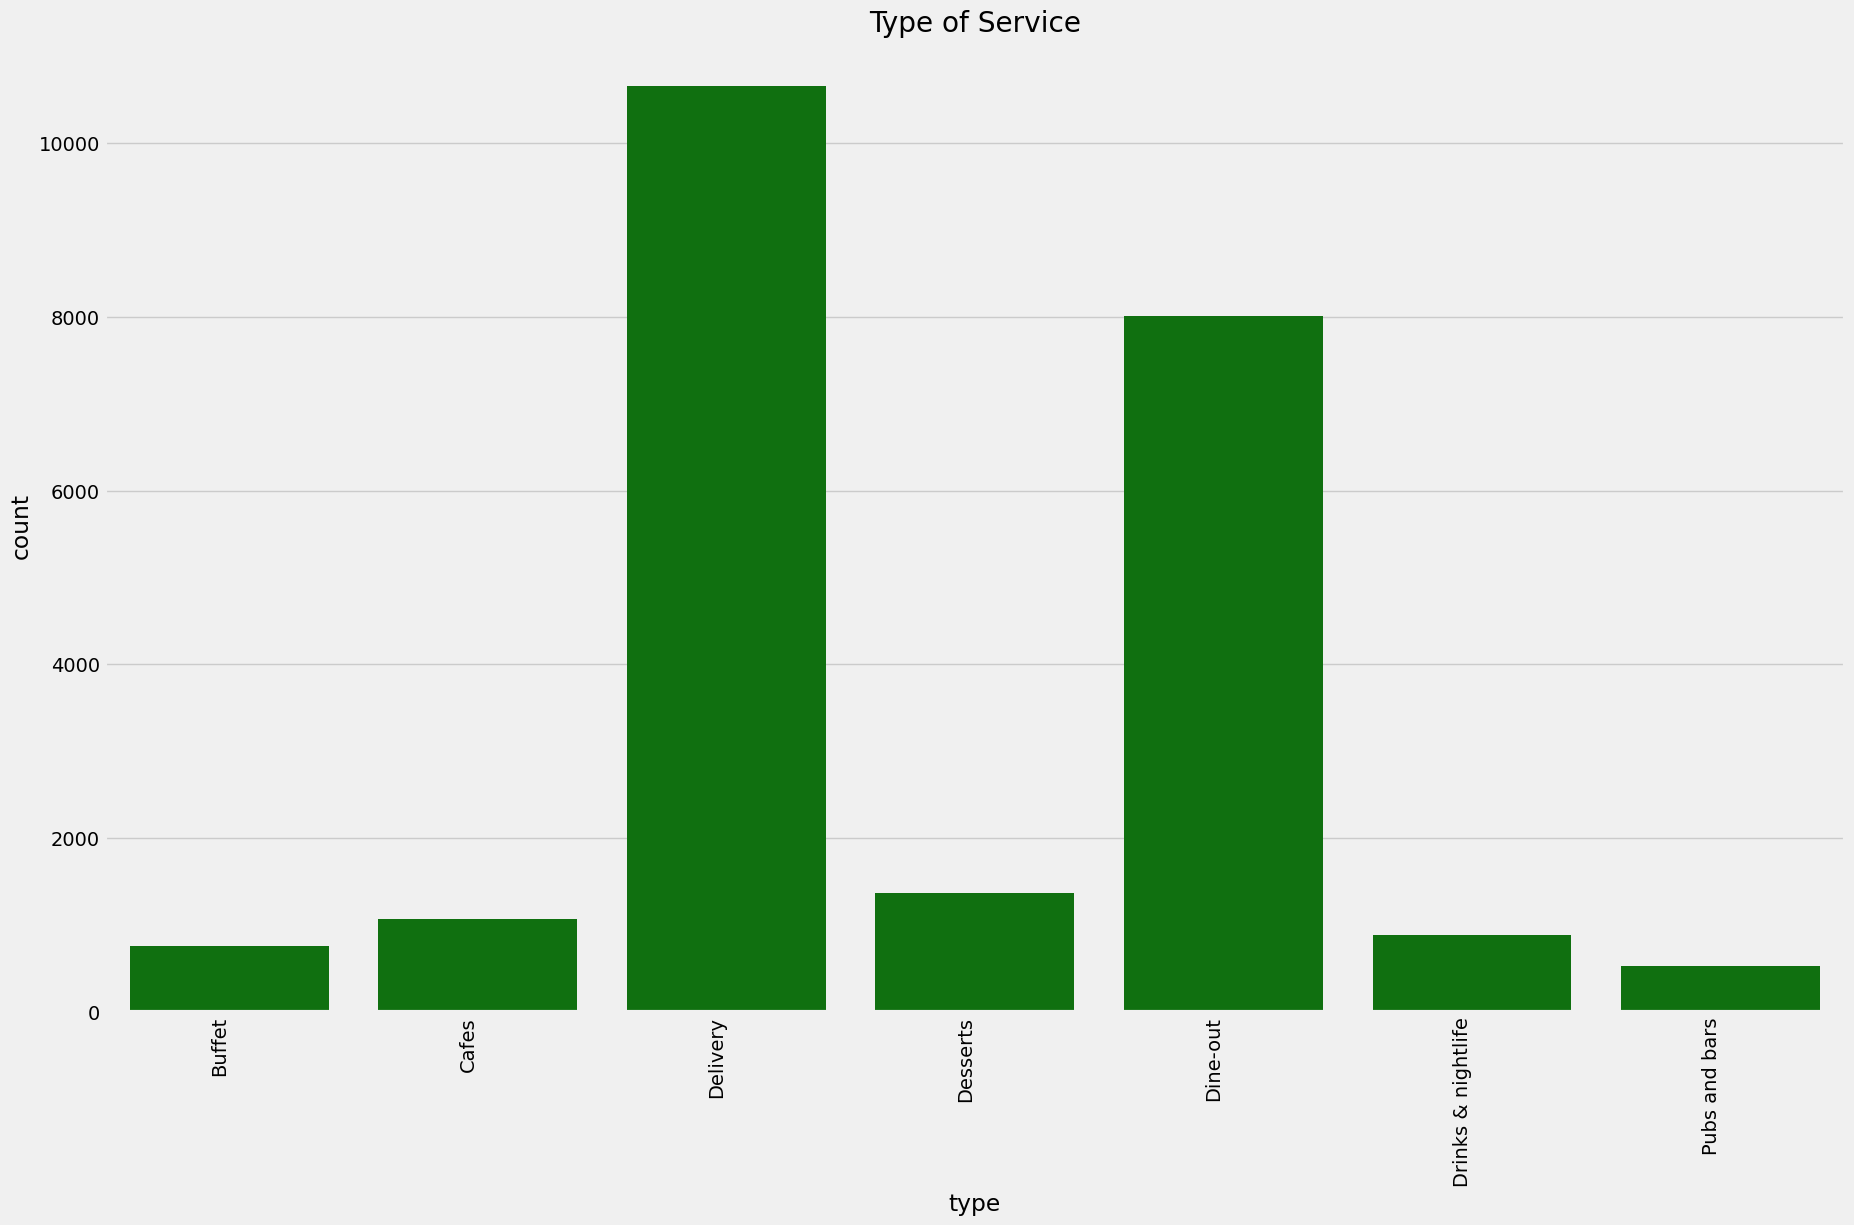

In [64]:
plt.figure(figsize=(20, 12)) 

ax = sns.countplot(x='type', data=df, color="green")  
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")  # Rotate labels

plt.title('Type of Service')  # Set title
plt.show()

In [65]:
np.sort(df["cost"].unique())

array([  40.,  100.,  120.,  150.,  180.,  200.,  230.,  250.,  300.,
        330.,  350.,  400.,  450.,  500.,  550.,  600.,  650.,  700.,
        750.,  800.,  850.,  900.,  950., 1000., 1050., 1100., 1200.,
       1250., 1300., 1350., 1400., 1450., 1500., 1600., 1650., 1700.,
       1800., 1900., 2000., 2100., 2200., 2300., 2400., 2500., 2600.,
       2700., 2800., 3000., 3200., 3400., 3500., 3700., 4000., 4100.,
       4500., 5000., 6000.])

In [66]:
len(np.sort(df["cost"].unique()))

57

In [67]:
df.groupby("cost").size()

cost
40.0         8
100.0      120
120.0        2
150.0      371
180.0       17
200.0      869
230.0       10
250.0      697
300.0     1688
330.0        4
350.0      553
400.0     2478
450.0      719
500.0     2321
550.0      440
600.0     2168
650.0      644
700.0     1202
750.0      651
800.0     1647
850.0      122
900.0      524
950.0       47
1000.0    1218
1050.0       4
1100.0     450
1200.0     903
1250.0       8
1300.0     496
1350.0      18
1400.0     447
1450.0       5
1500.0     841
1600.0     237
1650.0       6
1700.0     229
1800.0     193
1900.0      58
2000.0     298
2100.0      60
2200.0      39
2300.0       1
2400.0      22
2500.0     143
2600.0       4
2700.0       2
2800.0      31
3000.0     159
3200.0       2
3400.0      13
3500.0      25
3700.0       1
4000.0      24
4100.0       4
4500.0       2
5000.0       1
6000.0       2
dtype: int64

In [68]:

trace0 = go.Box(y=df["cost"], name="accepting order online", marker=dict(color="rgb(113,10,100)"))
data = [trace0]

# Layout settings
layout = go.Layout(title="Box Plot of approx cost", width=800, height=800, yaxis=dict(title="price"))

# Creating figure
fig = go.Figure(data=data, layout=layout)

# Plot the figure
py.iplot(fig)

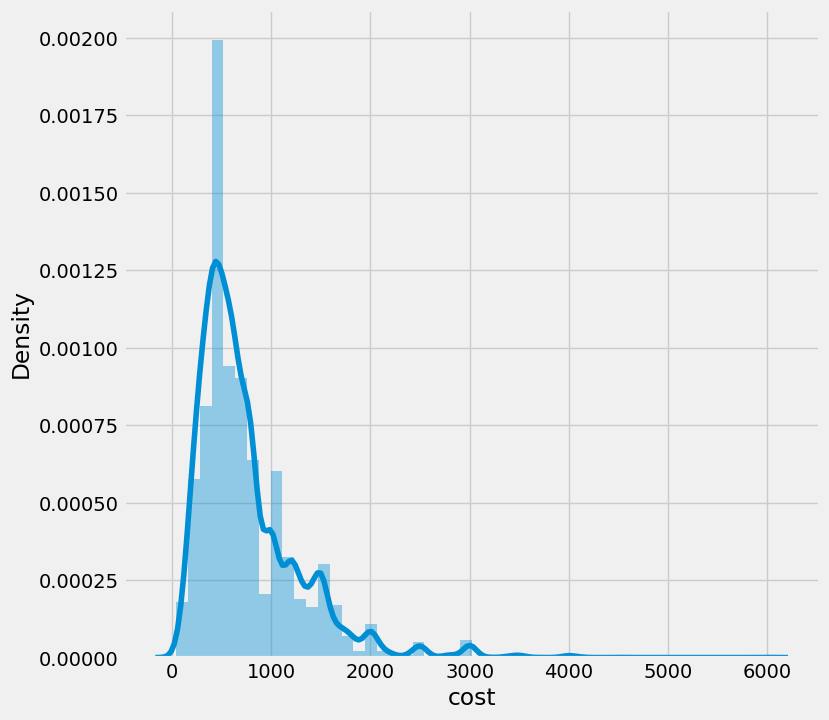

In [69]:
plt.figure(figsize=(8,8))
sns.distplot(df['cost'])
plt.show()


In [70]:
import re
df.index = range(df.shape[0])
likes = []
for i in range((df.shape[0])):
    array_split = re.split(",", df["dish_liked"][i])
    for item in array_split:
        likes.append(item)

In [71]:
likes

['Pasta',
 ' Lunch Buffet',
 ' Masala Papad',
 ' Paneer Lajawab',
 ' Tomato Shorba',
 ' Dum Biryani',
 ' Sweet Corn Soup',
 'Momos',
 ' Lunch Buffet',
 ' Chocolate Nirvana',
 ' Thai Green Curry',
 ' Paneer Tikka',
 ' Dum Biryani',
 ' Chicken Biryani',
 'Churros',
 ' Cannelloni',
 ' Minestrone Soup',
 ' Hot Chocolate',
 ' Pink Sauce Pasta',
 ' Salsa',
 ' Veg Supreme Pizza',
 'Masala Dosa',
 'Panipuri',
 ' Gol Gappe',
 'Onion Rings',
 ' Pasta',
 ' Kadhai Paneer',
 ' Salads',
 ' Salad',
 ' Roti',
 ' Jeera Rice',
 'Farmhouse Pizza',
 ' Chocolate Banana',
 ' Virgin Mojito',
 ' Pasta',
 ' Paneer Tikka',
 ' Lime Soda',
 ' Prawn Pizza',
 'Pizza',
 ' Mocktails',
 ' Coffee',
 ' Nachos',
 ' Salad',
 ' Pasta',
 ' Sandwiches',
 'Waffles',
 ' Pasta',
 ' Coleslaw Sandwich',
 ' Choco Waffle',
 ' Tacos',
 ' Momos',
 ' Cheese Nachos',
 'Waffles',
 ' Pasta',
 ' Crispy Chicken',
 ' Honey Chilli Chicken',
 ' Sandwich',
 ' Coffee',
 ' Crepe',
 'Mocktails',
 ' Peri Fries',
 ' Lasagne',
 ' Pizza',
 ' Chicken 

In [72]:
len(likes)

126848

In [73]:
df.index = range(df.shape[0])
df.index

RangeIndex(start=0, stop=23248, step=1)

In [74]:
fav_food = pd.Series(likes).value_counts()
fav_food.head(30)

 Pasta              2692
 Pizza              1915
 Cocktails          1880
 Burgers            1736
 Mocktails          1623
 Biryani            1307
 Sandwiches         1287
Burgers             1256
 Coffee             1184
 Nachos             1170
 Fish               1116
 Paratha            1107
 Salads             1055
 Chicken Biryani    1004
Cocktails            891
 Fries               876
 Noodles             854
 Beer                835
 Mutton Biryani      832
 Tea                 819
Coffee               801
 Sandwich            788
 Butter Chicken      782
 Thali               770
Biryani              749
Pizza                747
 Roti                729
 Brownie             726
 Salad               677
 Hot Chocolate       672
Name: count, dtype: int64

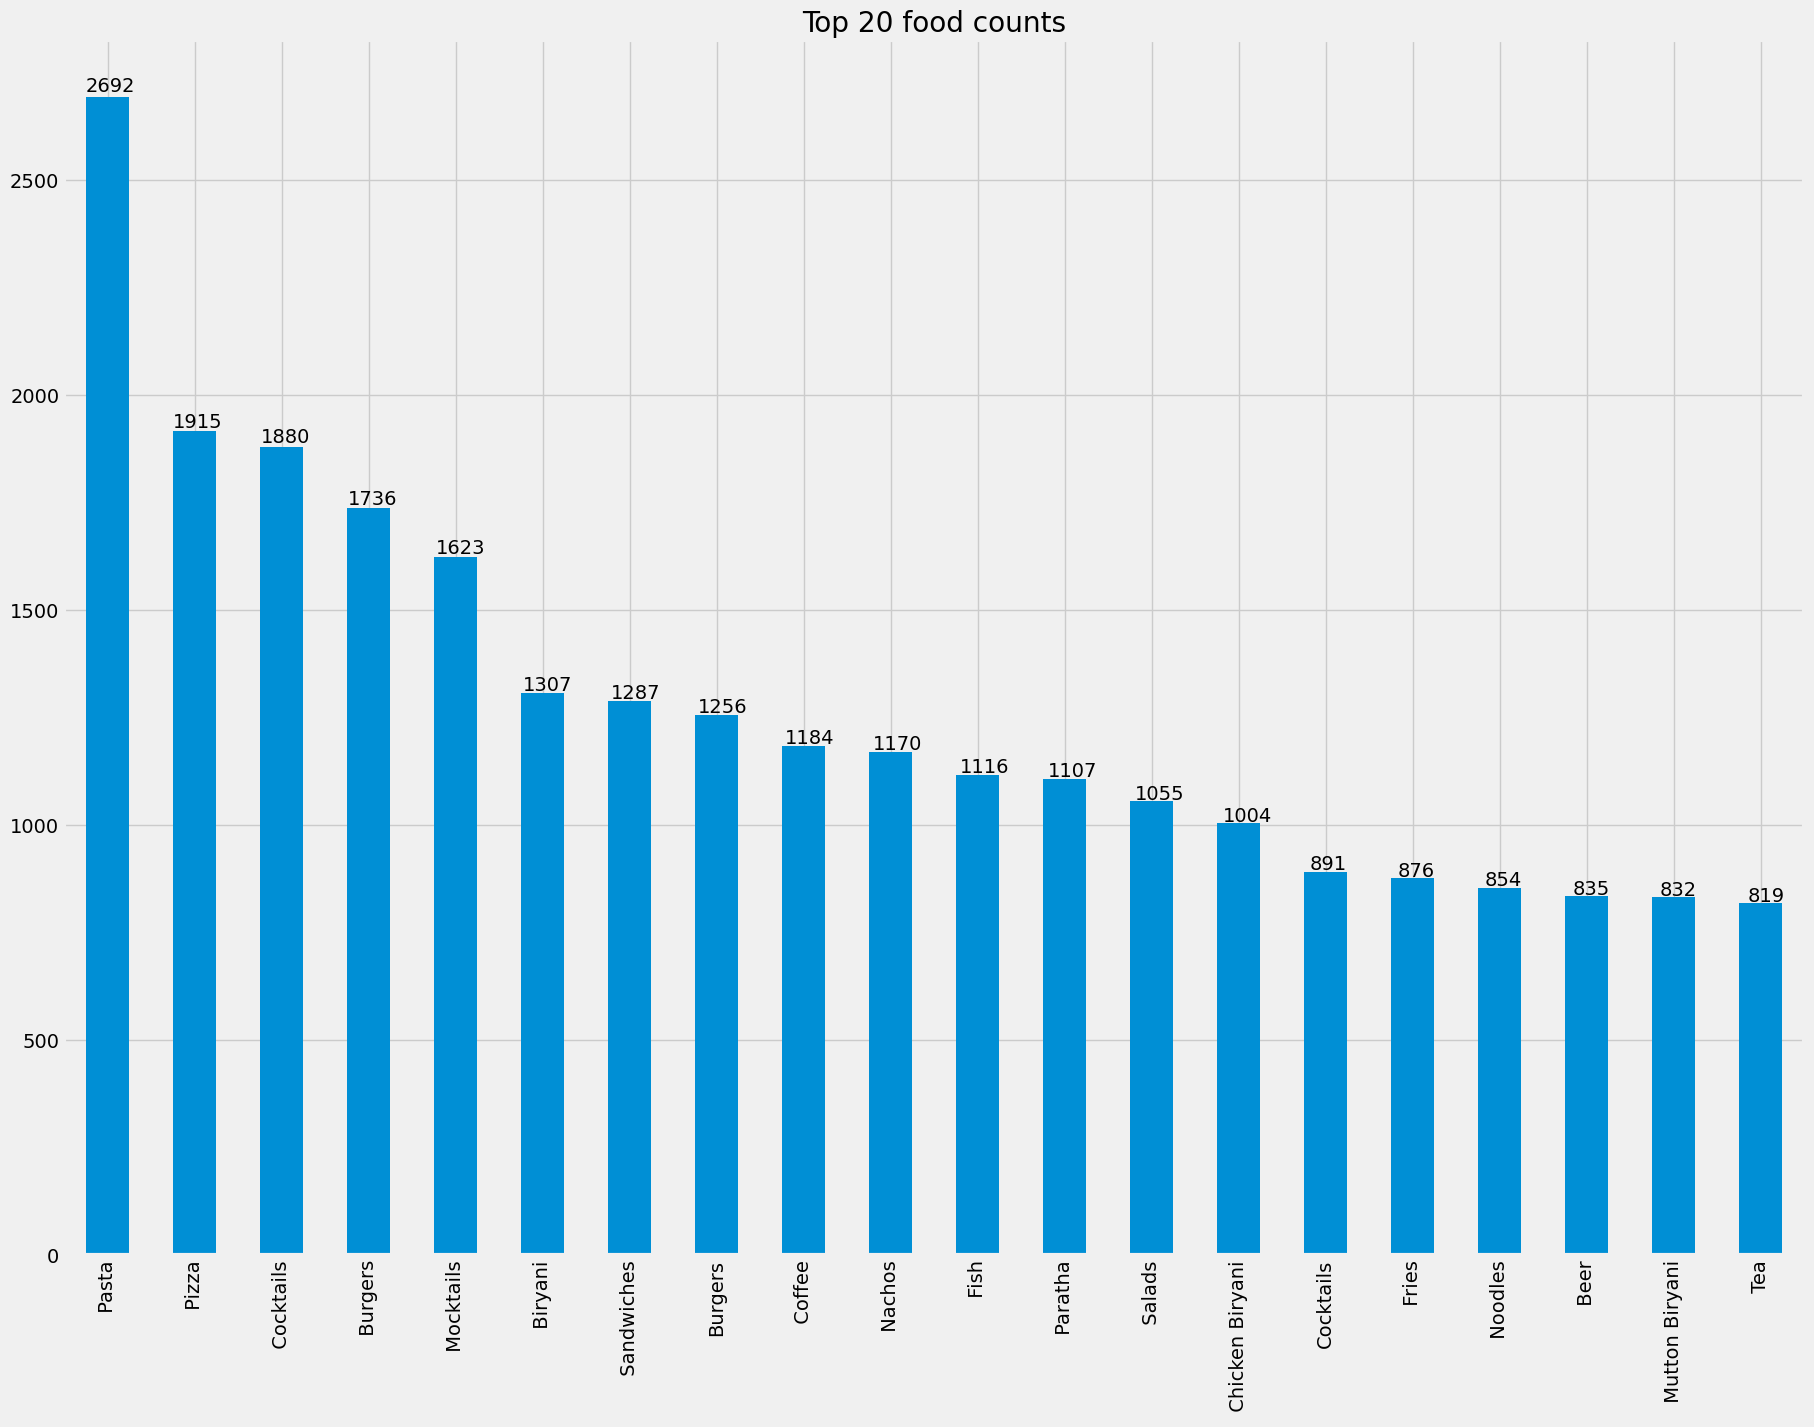

In [75]:
ax = fav_food.nlargest(n=20, keep="first").plot(kind="bar", figsize=(20,15), title="Top 20 food counts")
for i in ax.patches:
    ax.annotate(str(i.get_height()), (i.get_x()* 1.005, i.get_height() * 1.005))

In [76]:
print (df['rest_type'].value_counts().head(50))

rest_type
Casual Dining                    7326
Quick Bites                      5250
Cafe                             2375
Dessert Parlor                   1083
Casual Dining, Bar                985
Delivery                          704
Bar                               358
Takeaway, Delivery                342
Bar, Casual Dining                336
Pub                               324
Fine Dining                       311
Casual Dining, Cafe               304
Lounge                            298
Pub, Casual Dining                224
Food Court                        220
Bakery                            166
Cafe, Casual Dining               159
Dessert Parlor, Cafe              143
Beverage Shop, Quick Bites        137
Beverage Shop                     137
Cafe, Bakery                      128
Casual Dining, Pub                124
Microbrewery, Casual Dining       121
Cafe, Dessert Parlor              111
Sweet Shop                        105
Bakery, Quick Bites                96
Sw

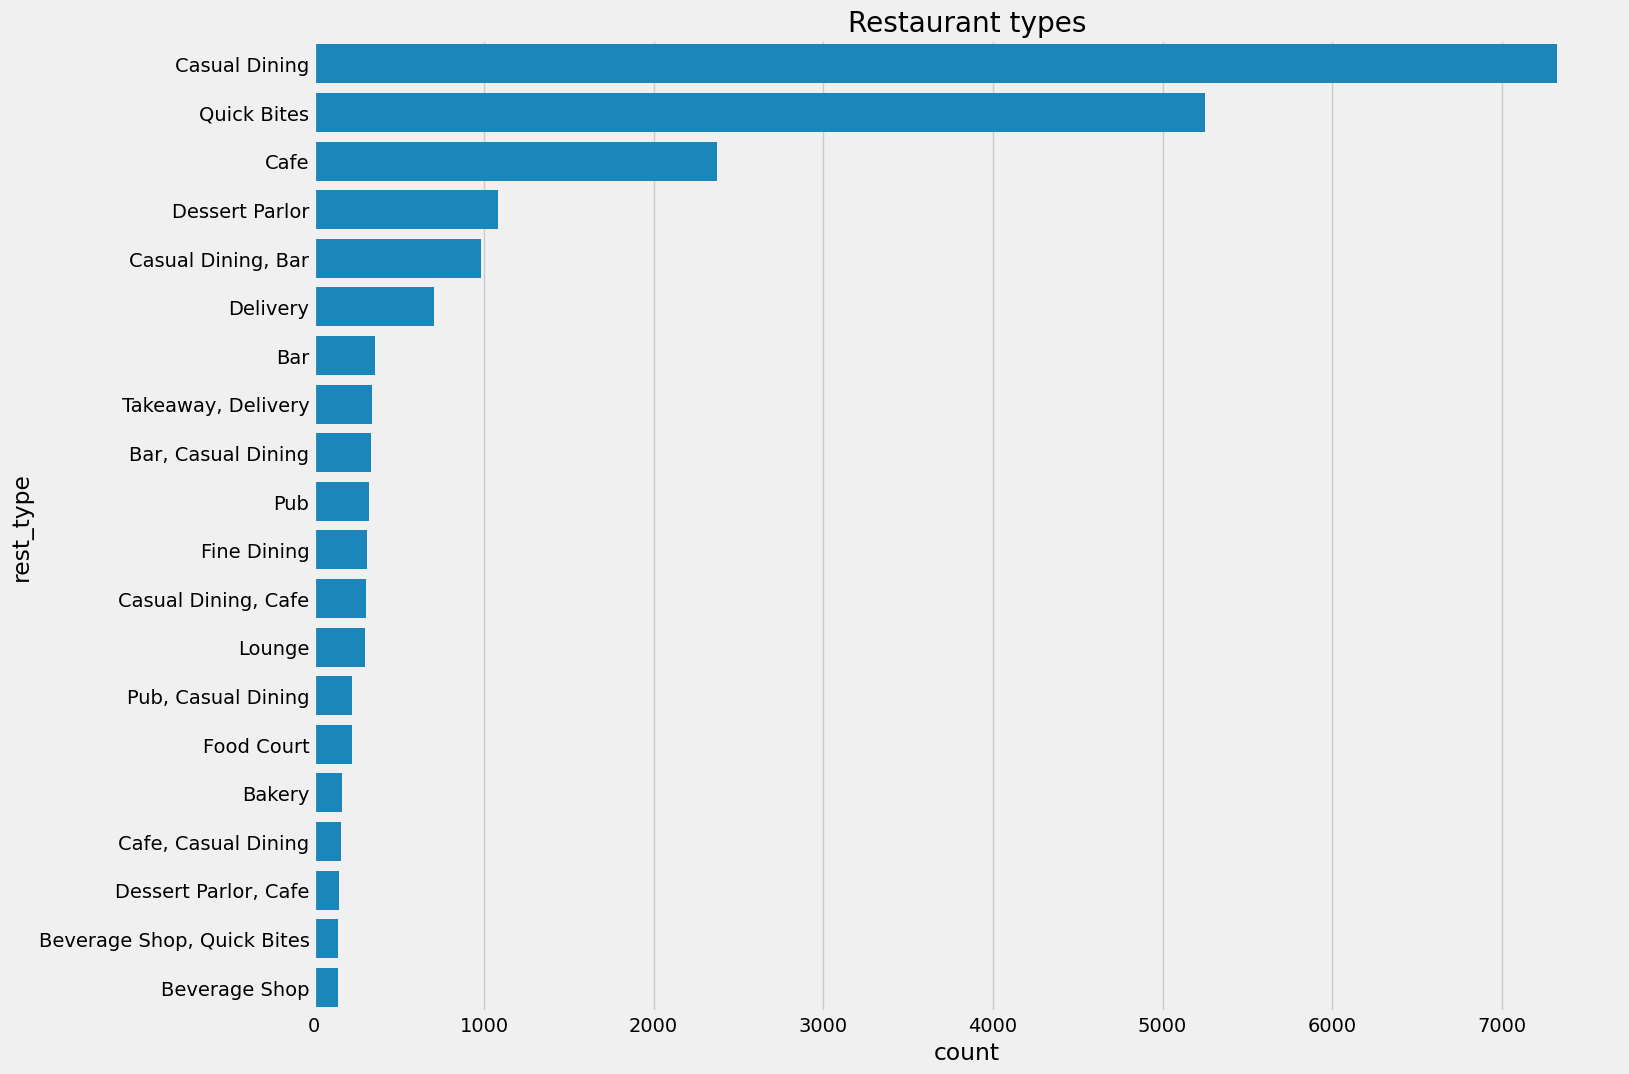

In [77]:
plt.figure(figsize=(15,12))
rest=df['rest_type'].value_counts().head(20)
sns.barplot(x= rest,y =rest.index)
plt.title("Restaurant types")
plt.xlabel("count")
plt.show()


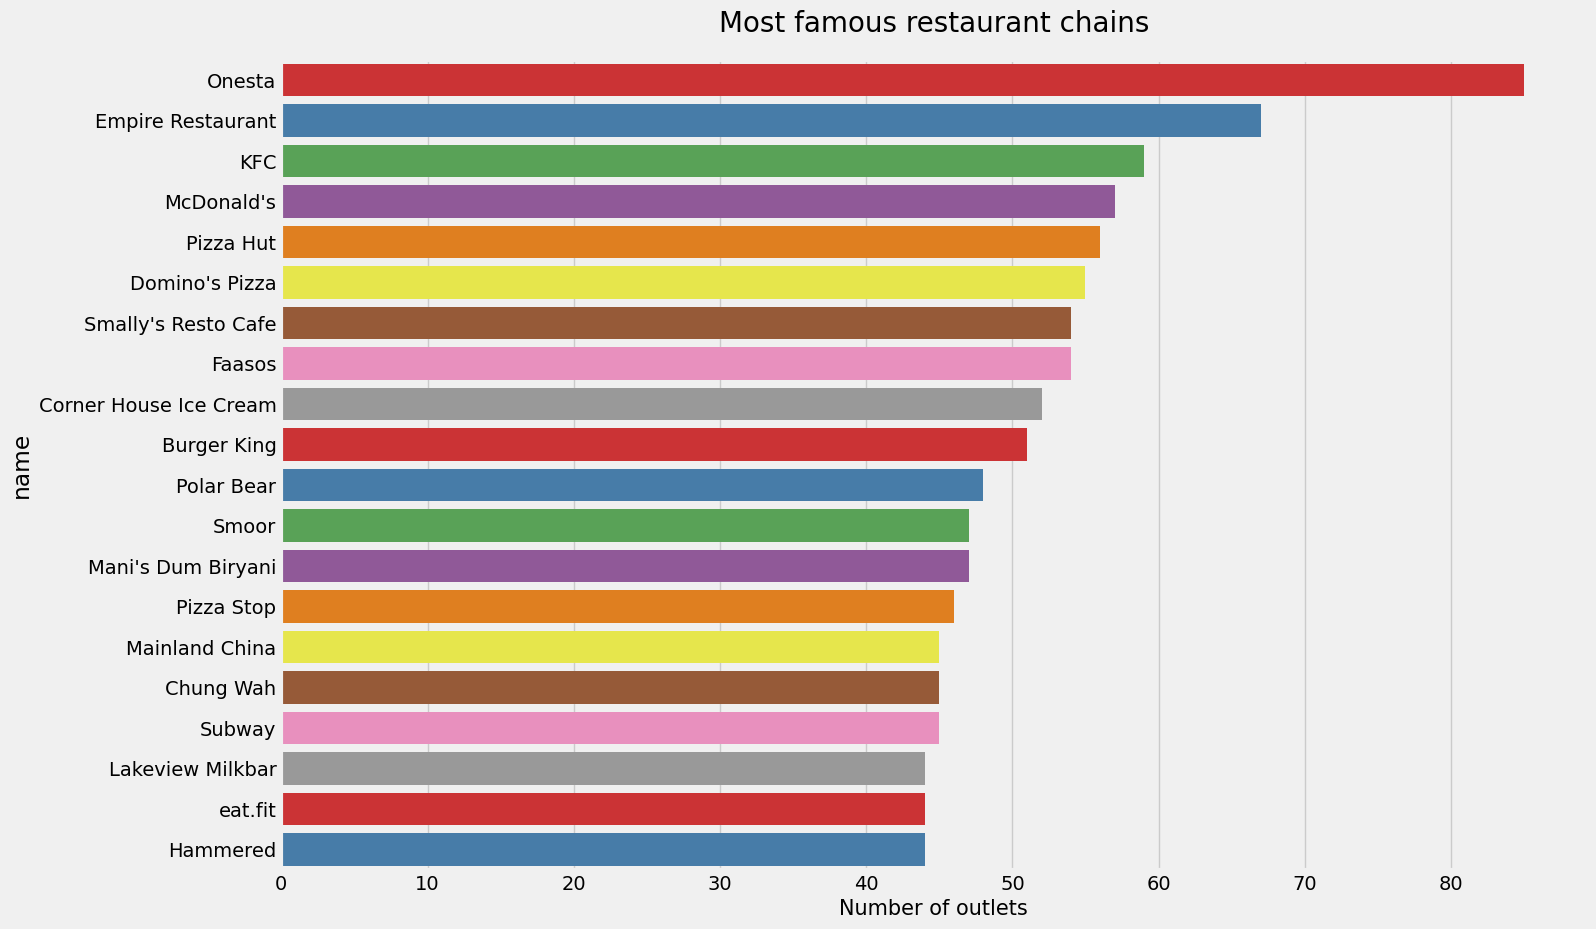

In [78]:
plt.figure(figsize=(15,10))
chains=df['name'].value_counts().head(20)
sns.barplot(x=chains,y=chains.index,palette='Set1')
plt.title("Most famous restaurant chains",size=20,pad=20)
plt.xlabel("Number of outlets",size=15)
plt.show()


In [79]:
df.shape

(23248, 15)

In [80]:
df["online_order"][df["online_order"] == "Yes"] = 1
df["online_order"][df["online_order"] == "No"] = 0
df.head(5)

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,1,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,1,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,1,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,0,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,0,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [81]:
df["online_order"].value_counts()

online_order
1    16378
0     6870
Name: count, dtype: int64

In [82]:
df["online_order"] = pd.to_numeric(df["online_order"])
display (df.head(20))

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,1,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,1,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,1,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,0,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,0,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
5,"37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...",Timepass Dinner,1,No,3.8,286,Basavanagudi,Casual Dining,"Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...",North Indian,600.0,"[('Rated 3.0', 'RATED\n Food 3/5\nAmbience 3/...",[],Buffet,Banashankari
6,"2469, 3rd Floor, 24th Cross, Opposite BDA Comp...",Onesta,1,Yes,4.6,2556,Banashankari,"Casual Dining, Cafe","Farmhouse Pizza, Chocolate Banana, Virgin Moji...","Pizza, Cafe, Italian",600.0,"[('Rated 5.0', 'RATED\n I personally really l...",[],Cafes,Banashankari
7,"1, 30th Main Road, 3rd Stage, Banashankari, Ba...",Penthouse Cafe,1,No,4.0,324,Banashankari,Cafe,"Pizza, Mocktails, Coffee, Nachos, Salad, Pasta...","Cafe, Italian, Continental",700.0,"[('Rated 3.0', ""RATED\n I had been to this pl...",[],Cafes,Banashankari
8,"2470, 21 Main Road, 25th Cross, Banashankari, ...",Smacznego,1,No,4.2,504,Banashankari,Cafe,"Waffles, Pasta, Coleslaw Sandwich, Choco Waffl...","Cafe, Mexican, Italian, Momos, Beverages",550.0,"[('Rated 4.0', ""RATED\n Easy to locate\nVFM 3...",[],Cafes,Banashankari
9,"12,29 Near PES University Back Gate, D'Souza N...",CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The A...,1,No,4.1,402,Banashankari,Cafe,"Waffles, Pasta, Crispy Chicken, Honey Chilli C...",Cafe,500.0,"[('Rated 4.0', 'RATED\n We ended up here on a...",[],Cafes,Banashankari


In [83]:
df["book_table"][df["book_table"] == 'Yes'] = 1 
df["book_table"][df["book_table"] == 'No'] = 0
display (df)


,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,1,0,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,0,0,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23243,"2nd Floor, Iona, Virginia Mall, Whitefield Mai...",Izakaya Gastro Pub,1,1,3.8,128,Whitefield,"Bar, Casual Dining","Beer, Chicken Guntur, Paneer Tikka, Fish, Nood...","North Indian, Continental, Mediterranean",1200.0,"[('Rated 3.0', ""RATED\n Nice place to hangout...",[],Pubs and bars,Whitefield
23244,"Bengaluru Marriott Hotel, 75, 8th Road, EPIP A...",M Bar - Bengaluru Marriott Hotel Whitefield,0,0,3.9,77,Whitefield,"Fine Dining, Bar",Rooftop Ambience,Finger Food,2000.0,"[('Rated 4.0', 'RATED\n Went there post dinne...",[],Pubs and bars,Whitefield
23245,"Keys Hotel, 6, 1st Phase Industrial Area, Near...",Keys Cafe - Keys Hotel,0,0,2.8,161,Whitefield,"Casual Dining, Bar","Salads, Coffee, Breakfast Buffet, Halwa, Chick...","Chinese, Continental, North Indian",1200.0,"[('Rated 3.0', 'RATED\n Place is good not tha...",[],Pubs and bars,Whitefield
23246,"139/C1, Next To GR Tech Park, Pattandur Agraha...",Bhagini,0,0,2.5,81,Whitefield,"Casual Dining, Bar","Biryani, Andhra Meal","Andhra, South Indian, Chinese, North Indian",800.0,"[('Rated 4.0', 'RATED\n A fine place to chill...",[],Pubs and bars,Whitefield


In [84]:
df.dtypes

address          object
name             object
online_order      int64
book_table       object
rate            float64
votes             int64
location         object
rest_type        object
dish_liked       object
cuisines         object
cost            float64
reviews_list     object
menu_item        object
type             object
city             object
dtype: object

In [85]:
df["book_table"] = pd.to_numeric(df["book_table"])
print (df["book_table"].dtypes)

int64


In [86]:
display(df["book_table"].value_counts())

book_table
0    17191
1     6057
Name: count, dtype: int64

In [87]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.location = le.fit_transform(df.location)
df.rest_type = le.fit_transform(df.rest_type)
df.cuisines = le.fit_transform(df.cuisines)
df.menu_item = le.fit_transform(df.menu_item)


In [88]:
df

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,1,1,4.1,775,1,20,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...",1386,800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",5047,Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,1,0,4.1,787,1,20,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...",594,800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",5047,Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,1,0,3.8,918,1,16,"Churros, Cannelloni, Minestrone Soup, Hot Choc...",484,800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",5047,Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,0,0,3.7,88,1,62,Masala Dosa,1587,300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",5047,Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,0,0,3.8,166,4,20,"Panipuri, Gol Gappe",1406,600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",5047,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23243,"2nd Floor, Iona, Virginia Mall, Whitefield Mai...",Izakaya Gastro Pub,1,1,3.8,128,84,5,"Beer, Chicken Guntur, Paneer Tikka, Fish, Nood...",1318,1200.0,"[('Rated 3.0', ""RATED\n Nice place to hangout...",5047,Pubs and bars,Whitefield
23244,"Bengaluru Marriott Hotel, 75, 8th Road, EPIP A...",M Bar - Bengaluru Marriott Hotel Whitefield,0,0,3.9,77,84,38,Rooftop Ambience,878,2000.0,"[('Rated 4.0', 'RATED\n Went there post dinne...",5047,Pubs and bars,Whitefield
23245,"Keys Hotel, 6, 1st Phase Industrial Area, Near...",Keys Cafe - Keys Hotel,0,0,2.8,161,84,21,"Salads, Coffee, Breakfast Buffet, Halwa, Chick...",539,1200.0,"[('Rated 3.0', 'RATED\n Place is good not tha...",5047,Pubs and bars,Whitefield
23246,"139/C1, Next To GR Tech Park, Pattandur Agraha...",Bhagini,0,0,2.5,81,84,21,"Biryani, Andhra Meal",80,800.0,"[('Rated 4.0', 'RATED\n A fine place to chill...",5047,Pubs and bars,Whitefield


In [89]:
my_data=df.iloc[:,[2,3,4,5,6,7,9,10,12]]
my_data.to_csv('Zomato_df.csv')
display (my_data)


,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,menu_item
0,1,1,4.1,775,1,20,1386,800.0,5047
1,1,0,4.1,787,1,20,594,800.0,5047
2,1,0,3.8,918,1,16,484,800.0,5047
3,0,0,3.7,88,1,62,1587,300.0,5047
4,0,0,3.8,166,4,20,1406,600.0,5047
...,...,...,...,...,...,...,...,...,...
23243,1,1,3.8,128,84,5,1318,1200.0,5047
23244,0,0,3.9,77,84,38,878,2000.0,5047
23245,0,0,2.8,161,84,21,539,1200.0,5047
23246,0,0,2.5,81,84,21,80,800.0,5047


In [90]:
x = df.iloc[:,[2,3,5,6,7,9,10,12]]
display (x.head())


,online_order,book_table,votes,location,rest_type,cuisines,cost,menu_item
0,1,1,775,1,20,1386,800.0,5047
1,1,0,787,1,20,594,800.0,5047
2,1,0,918,1,16,484,800.0,5047
3,0,0,88,1,62,1587,300.0,5047
4,0,0,166,4,20,1406,600.0,5047


In [91]:
y = df['rate']
display(y)


0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
23243    3.8
23244    3.9
23245    2.8
23246    2.5
23247    4.3
Name: rate, Length: 23248, dtype: float64

In [92]:
x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=10)
print (x.shape)
print (x_train.shape)
print (x_test.shape)
print (y_train.shape)
print (y_test.shape)


(23248, 8)
(16273, 8)
(6975, 8)
(16273,)
(6975,)


In [93]:
lr_model=LinearRegression()
lr_model.fit(x_train,y_train)
print (lr_model)


LinearRegression()


In [94]:
from sklearn.metrics import r2_score
y_pred=lr_model.predict(x_test)
display (r2_score(y_test,y_pred))


0.2281882852296726

In [95]:
from sklearn.ensemble import RandomForestRegressor
RF_Model=RandomForestRegressor(n_estimators=650,random_state=245,min_samples_leaf=.0001)
RF_Model.fit(x_train,y_train)
y_predict=RF_Model.predict(x_test)
display (r2_score(y_test,y_predict))


0.880973653871876

In [96]:
from sklearn.ensemble import  ExtraTreesRegressor
ET_Model=ExtraTreesRegressor(n_estimators = 120)
ET_Model.fit(x_train,y_train)
y_predict=ET_Model.predict(x_test)


In [97]:
from sklearn.metrics import r2_score
display(r2_score(y_test,y_predict))


0.9328638433729388

In [98]:
import pickle
# Saving model to disk
pickle.dump(ET_Model, open('model.pkl','wb'))

In [99]:
model=pickle.load(open('model.pkl','rb'))